In [49]:
# reading in MIRS L3 data
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import gzip

paf = '/home/dudavid/Dendrite/others/'
file = paf+'NPR-MIRS-IMG_CMAP_v11r2_gpm_D2017278.nc'
    
f = Dataset(file)
gwp_asc, gwp_des = f['Asc_GWP'], f['Des_GWP'] #1440x720 grids
# note: an IWP field does exist, but should be empty (as are many fields)!

gwplot = np.array(gwp_des)
gwplot.max()
#type(gwplot)

634

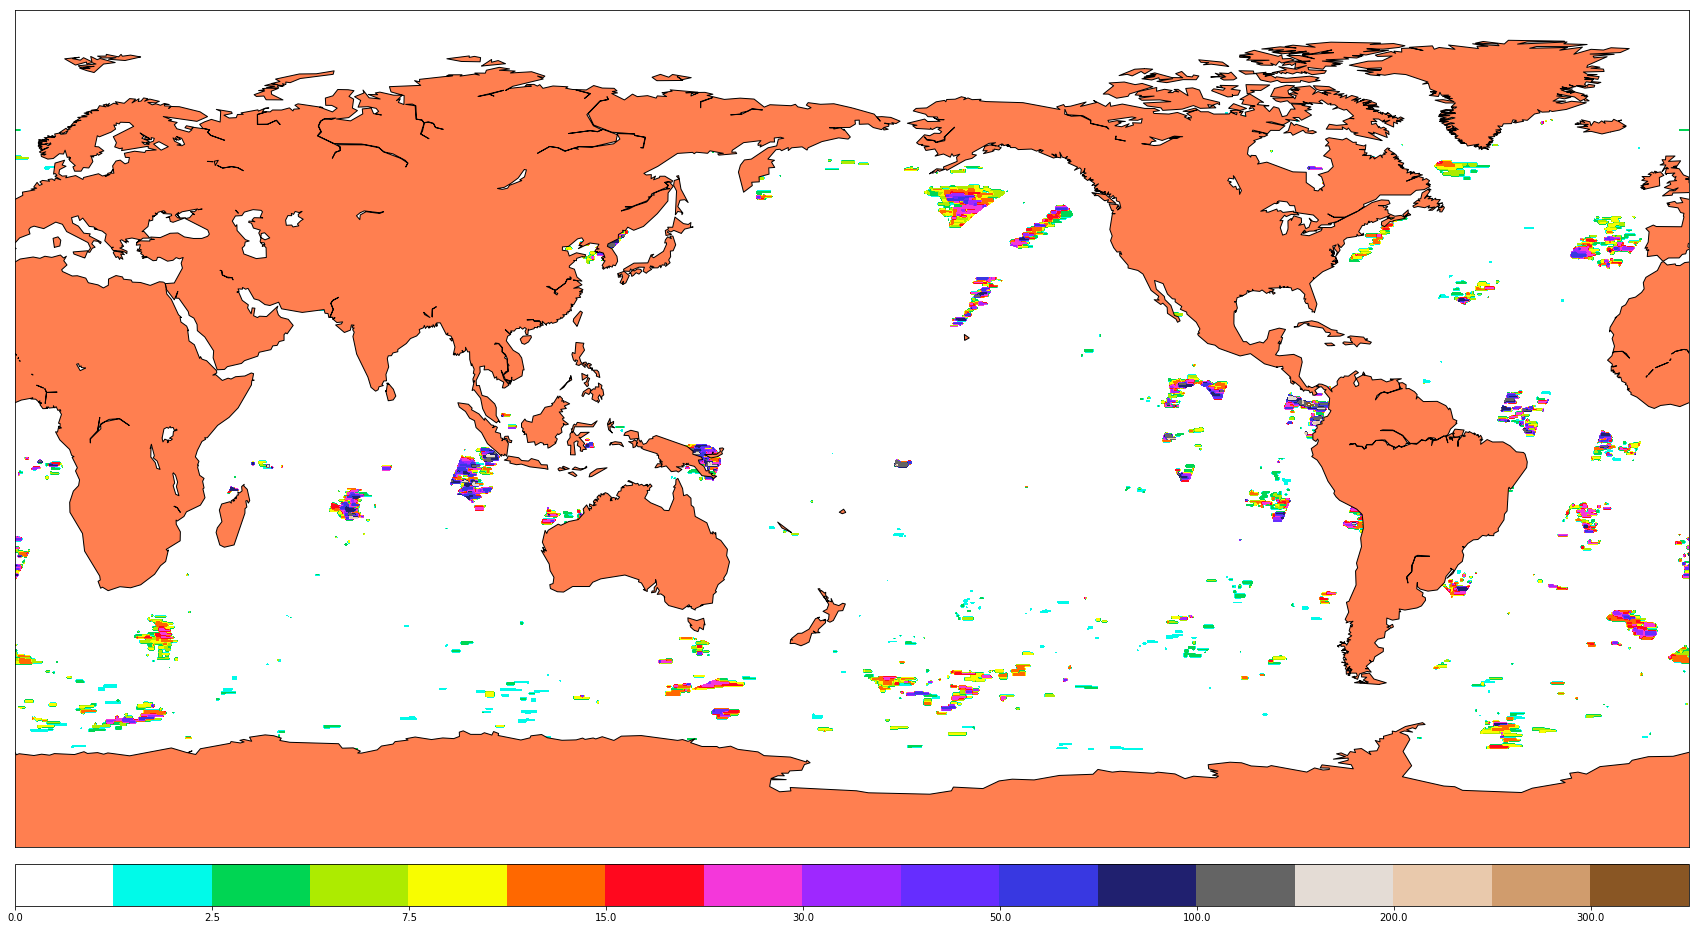

In [51]:

#mask = gwpa < 0
#gwpa[mask] = 0
#plt.imshow(gwpa)
#plt.colorbar()
#plt.show()

fig = plt.figure(figsize=[30,45])
m = Basemap(projection='cyl',lon_0=180)#,lat_0=0,resolution='l')
lons, lats = m.makegrid(1440,720)
x, y = m(lons, lats)
m.fillcontinents(color='coral')#,lake_color='aqua')
m.drawcoastlines()
#from datetime import datetime
#date = datetime.utcnow()
#CS = m.nightshade(date)
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400]
cs = m.contourf(x,y,gwplot,clevs,latlon=1,cmap=cm.s3pcpn)
cbar = m.colorbar(cs,location='bottom')
plt.show()
